1)Carbon monoxide


Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0113
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0028
Epoch 3/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0025
Epoch 4/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0024
Epoch 5/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0022
Epoch 6/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0022
Epoch 7/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0021
Epoch 8/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0020
Epoch 9/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018
Epoch 10/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0017
Epoch 11/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0018
Epoch 12/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0016
Epoch 13/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0016
Epoch 14/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0016
Epoch 15/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - l

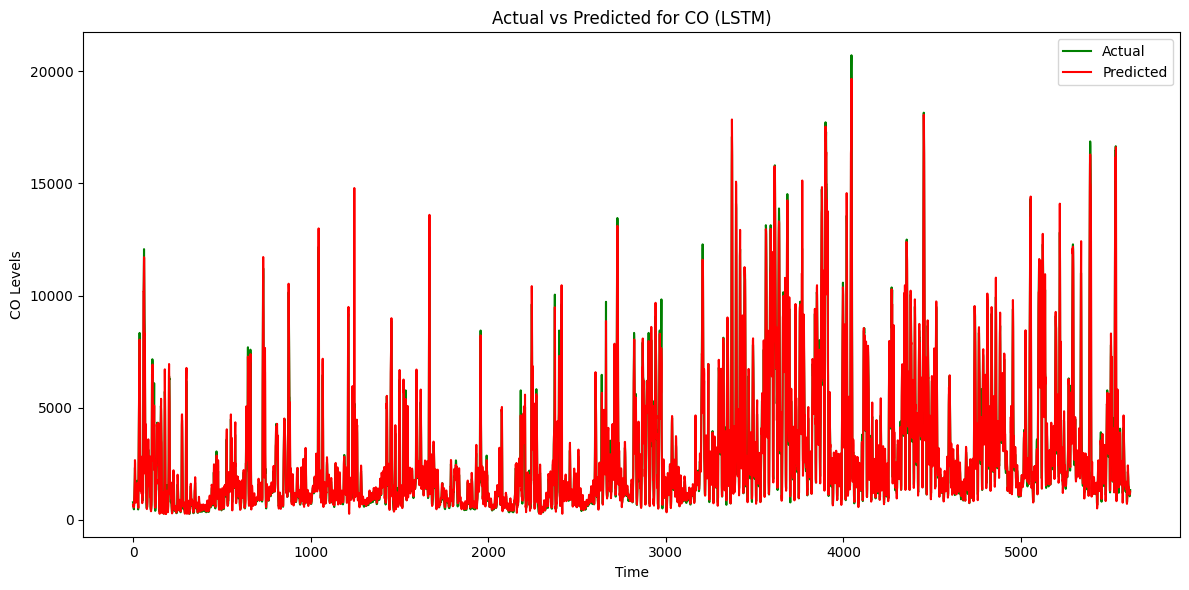

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['co']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = model.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae_co = mean_absolute_error(y_test_df, predictions_df)
mse_co = mean_squared_error(y_test_df, predictions_df)
rmse_co = np.sqrt(mse_co)

print(f"Performance Metrics for LSTM:")
print(f"Mean Absolute Error (MAE): {mae_co:.4f}")
print(f"Mean Squared Error (MSE): {mse_co:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_co:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['co'], label='Actual', color='green')
plt.plot(predictions_df['co'], label='Predicted', color='red')
plt.title('Actual vs Predicted for CO (LSTM)')
plt.xlabel('Time')
plt.ylabel('CO Levels')
plt.legend()
plt.tight_layout()
plt.show()


2)Nitrogen Oxide

Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0101
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0032
Epoch 3/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0024
Epoch 4/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0022
Epoch 5/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0021
Epoch 6/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0020
Epoch 7/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0018
Epoch 8/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0017
Epoch 9/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0017
Epoch 10/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0017
Epoch 11/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0017
Epoch 12/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0016
Epoch 13/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0017
Epoch 14/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0016
Epoch 15/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - lo

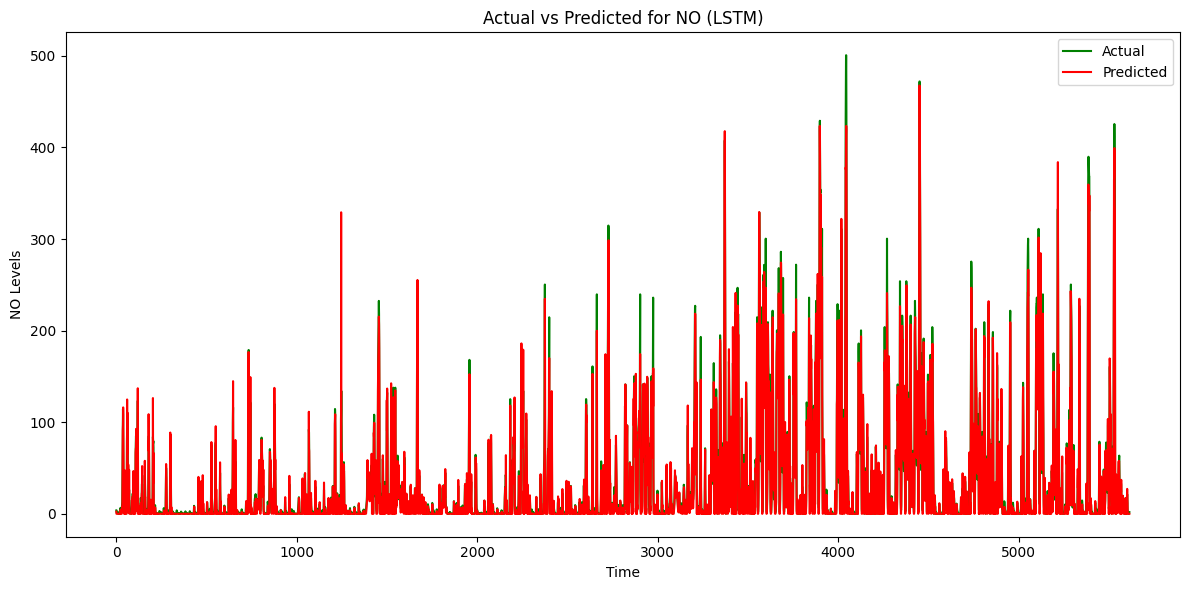

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['no']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = model.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae_no= mean_absolute_error(y_test_df, predictions_df)
mse_no= mean_squared_error(y_test_df, predictions_df)
rmse_no= np.sqrt(mse_no)

print(f"Performance Metrics for LSTM:")
print(f"Mean Absolute Error (MAE): {mae_no:.4f}")
print(f"Mean Squared Error (MSE): {mse_no:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_no:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['no'], label='Actual', color='green')
plt.plot(predictions_df['no'], label='Predicted', color='red')
plt.title('Actual vs Predicted for NO (LSTM)')
plt.xlabel('Time')
plt.ylabel('NO Levels')
plt.legend()
plt.tight_layout()
plt.show()


3)Nitrogen dioxide

Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0079
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0027
Epoch 3/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0020
Epoch 4/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0018
Epoch 5/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0017
Epoch 6/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0019
Epoch 7/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0014
Epoch 8/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0014
Epoch 9/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0014
Epoch 10/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0013
Epoch 11/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0014
Epoch 12/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0013
Epoch 13/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0013
Epoch 14/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0013
Epoch 15/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - lo

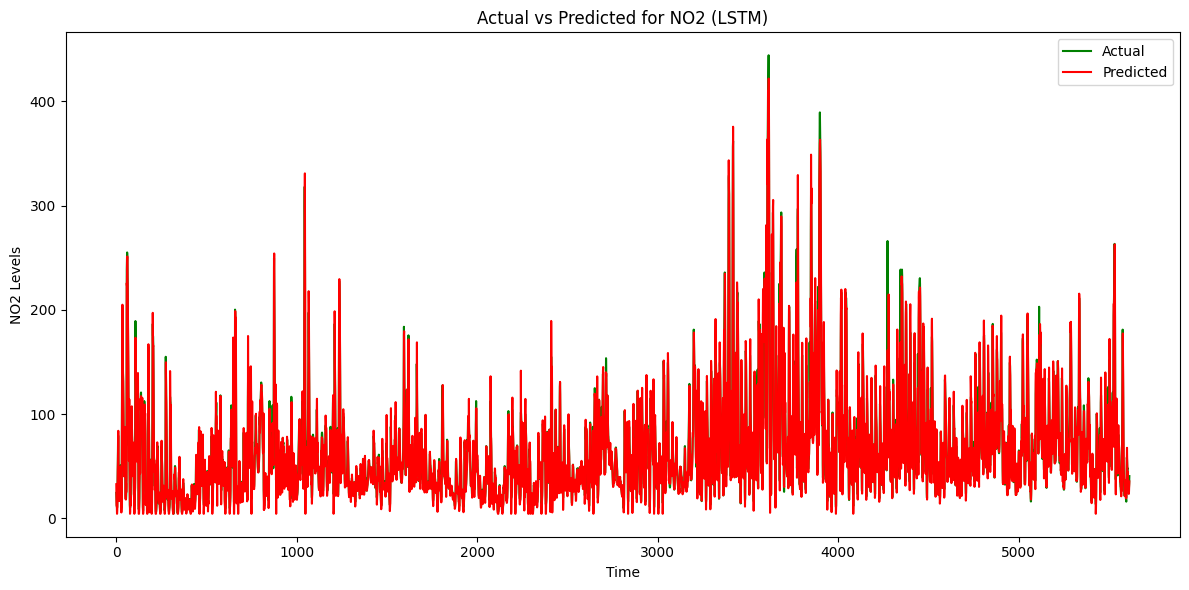

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['no2']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = model.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae_no2= mean_absolute_error(y_test_df, predictions_df)
mse_no2= mean_squared_error(y_test_df, predictions_df)
rmse_no2= np.sqrt(mse_no2)

print(f"Performance Metrics for LSTM:")
print(f"Mean Absolute Error (MAE): {mae_no2:.4f}")
print(f"Mean Squared Error (MSE): {mse_no2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_no2:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['no2'], label='Actual', color='green')
plt.plot(predictions_df['no2'], label='Predicted', color='red')
plt.title('Actual vs Predicted for NO2 (LSTM)')
plt.xlabel('Time')
plt.ylabel('NO2 Levels')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,25-11-2020 01:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,25-11-2020 02:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,25-11-2020 03:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,25-11-2020 04:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,25-11-2020 05:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18741,22-01-2023 22:00,1094.82,0.02,26.73,27.18,15.26,136.25,161.43,16.09
18742,22-01-2023 23:00,1041.41,0.03,26.39,25.39,17.17,130.82,153.69,16.72
18743,23-01-2023 00:00,1054.76,0.08,29.13,20.03,18.12,128.92,152.01,17.73
18744,23-01-2023 01:00,1121.52,0.33,33.24,15.02,20.03,130.29,158.47,18.24


4)Sulpher Dioxide

Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0048
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0015
Epoch 3/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0011
Epoch 4/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 9.3781e-04
Epoch 5/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 8.8342e-04
Epoch 6/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 8.9411e-04
Epoch 7/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 9.4281e-04
Epoch 8/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.9163e-04
Epoch 9/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.5826e-04
Epoch 10/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 8.2119e-04
Epoch 11/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.0713e-04
Epoch 12/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 8.4647e-04
Epoch 13/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 7.8020e-04
Epoch 14/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 8.4367e-04
Epoch 15/50

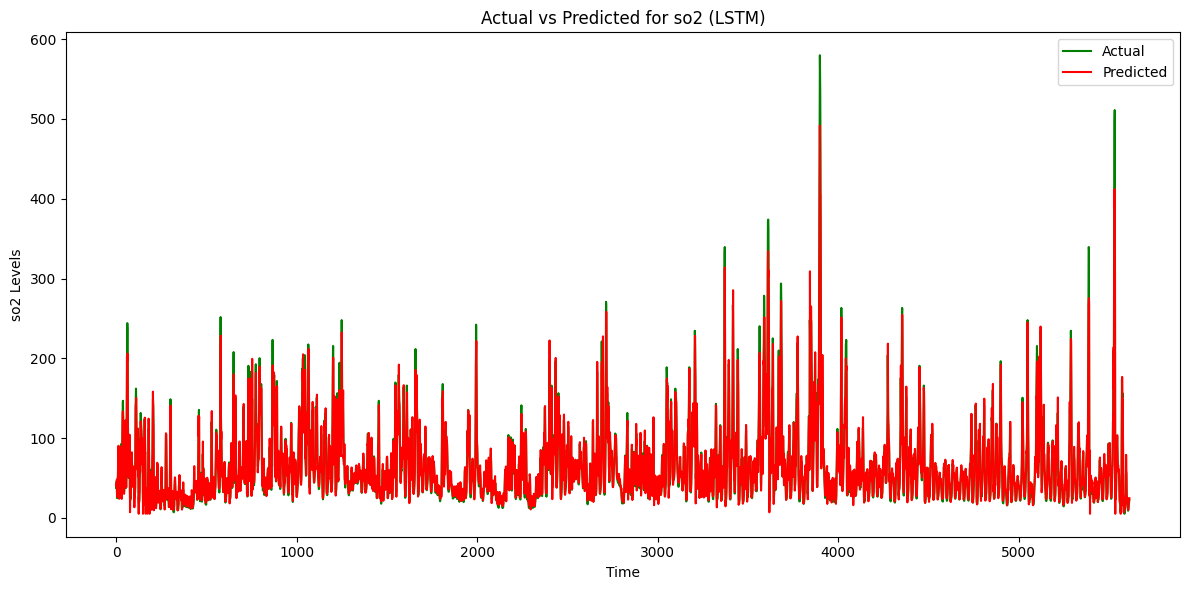

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['so2']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = model.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae_so2= mean_absolute_error(y_test_df, predictions_df)
mse_so2= mean_squared_error(y_test_df, predictions_df)
rmse_so2= np.sqrt(mse_so2)

print(f"Performance Metrics for LSTM:")
print(f"Mean Absolute Error (MAE): {mae_so2:.4f}")
print(f"Mean Squared Error (MSE): {mse_so2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_so2:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['so2'], label='Actual', color='green')
plt.plot(predictions_df['so2'], label='Predicted', color='red')
plt.title('Actual vs Predicted for so2 (LSTM)')
plt.xlabel('Time')
plt.ylabel('so2 Levels')
plt.legend()
plt.tight_layout()
plt.show()


5)Ozone


Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0064
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0029
Epoch 3/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018
Epoch 4/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0015
Epoch 5/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0011
Epoch 6/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0011
Epoch 7/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.7040e-04
Epoch 8/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 9.4608e-04
Epoch 9/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0010
Epoch 10/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.1509e-04
Epoch 11/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 9.3804e-04
Epoch 12/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.4479e-04
Epoch 13/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.7629e-04
Epoch 14/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.3414e-04
Epoch 15/50
410/410 ━━━━━━━

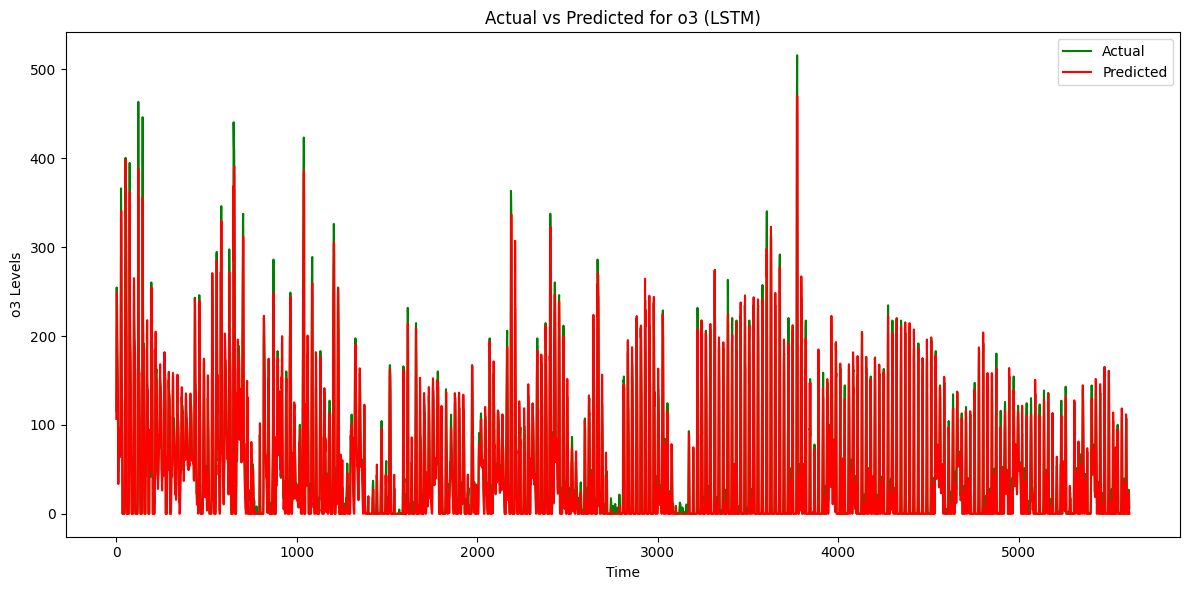

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['o3']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = model.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae_o3= mean_absolute_error(y_test_df, predictions_df)
mse_o3= mean_squared_error(y_test_df, predictions_df)
rmse_o3= np.sqrt(mse_o3)

print(f"Performance Metrics for LSTM:")
print(f"Mean Absolute Error (MAE): {mae_o3:.4f}")
print(f"Mean Squared Error (MSE): {mse_o3:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_o3:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['o3'], label='Actual', color='green')
plt.plot(predictions_df['o3'], label='Predicted', color='red')
plt.title('Actual vs Predicted for o3 (LSTM)')
plt.xlabel('Time')
plt.ylabel('o3 Levels')
plt.legend()
plt.tight_layout()
plt.show()


6)Ammonia

Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0061
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0015
Epoch 3/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0011
Epoch 4/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 9.5349e-04
Epoch 5/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 7.8975e-04
Epoch 6/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 7.6409e-04
Epoch 7/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 7.5819e-04
Epoch 8/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 7.6197e-04
Epoch 9/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 7.2193e-04
Epoch 10/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6.7380e-04
Epoch 11/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 6.5722e-04
Epoch 12/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 6.3225e-04
Epoch 13/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 6.5734e-04
Epoch 14/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 6.3472e-04
Epoch 15/50


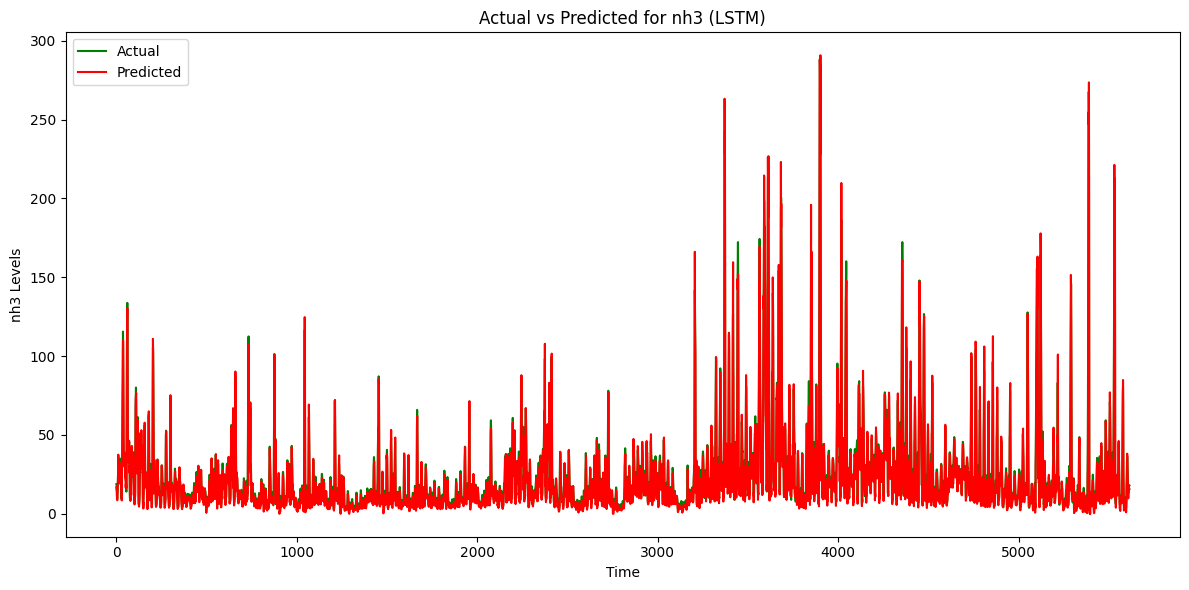

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['nh3']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = model.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae_nh3= mean_absolute_error(y_test_df, predictions_df)
mse_nh3= mean_squared_error(y_test_df, predictions_df)
rmse_nh3= np.sqrt(mse_nh3)

print(f"Performance Metrics for LSTM:")
print(f"Mean Absolute Error (MAE): {mae_nh3:.4f}")
print(f"Mean Squared Error (MSE): {mse_nh3:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_nh3:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['nh3'], label='Actual', color='green')
plt.plot(predictions_df['nh3'], label='Predicted', color='red')
plt.title('Actual vs Predicted for nh3 (LSTM)')
plt.xlabel('Time')
plt.ylabel('nh3 Levels')
plt.legend()
plt.tight_layout()
plt.show()


7)PM 2.5

Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0093
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0028
Epoch 3/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0021
Epoch 4/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018
Epoch 5/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0018
Epoch 6/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018
Epoch 7/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0016
Epoch 8/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0016
Epoch 9/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0017
Epoch 10/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0014
Epoch 11/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0013
Epoch 12/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0013
Epoch 13/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0014
Epoch 14/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013
Epoch 15/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - 

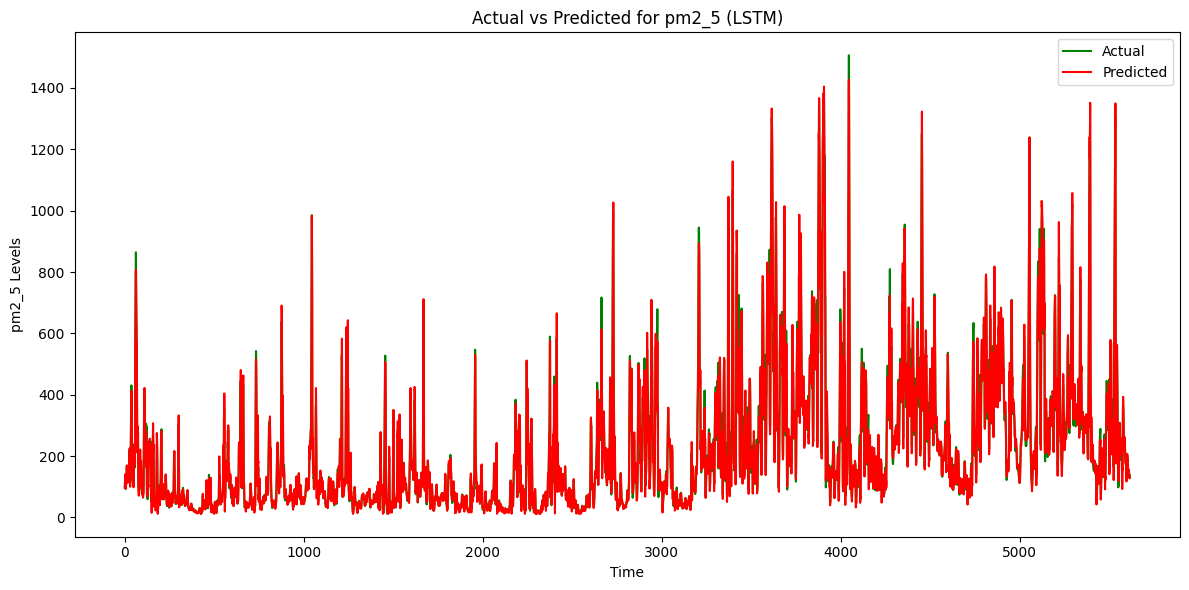

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['pm2_5']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = model.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae_pm25= mean_absolute_error(y_test_df, predictions_df)
mse_pm25= mean_squared_error(y_test_df, predictions_df)
rmse_pm25= np.sqrt(mse_pm25)

print(f"Performance Metrics for LSTM:")
print(f"Mean Absolute Error (MAE): {mae_pm25:.4f}")
print(f"Mean Squared Error (MSE): {mse_pm25:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_pm25:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['pm2_5'], label='Actual', color='green')
plt.plot(predictions_df['pm2_5'], label='Predicted', color='red')
plt.title('Actual vs Predicted for pm2_5 (LSTM)')
plt.xlabel('Time')
plt.ylabel('pm2_5 Levels')
plt.legend()
plt.tight_layout()
plt.show()


8)PM 10

Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0109
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0029
Epoch 3/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0021
Epoch 4/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0021
Epoch 5/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0021
Epoch 6/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0.0018
Epoch 7/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0018
Epoch 8/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0016
Epoch 9/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0016
Epoch 10/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0015
Epoch 11/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0015
Epoch 12/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0014
Epoch 13/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0015
Epoch 14/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0013
Epoch 15/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 4

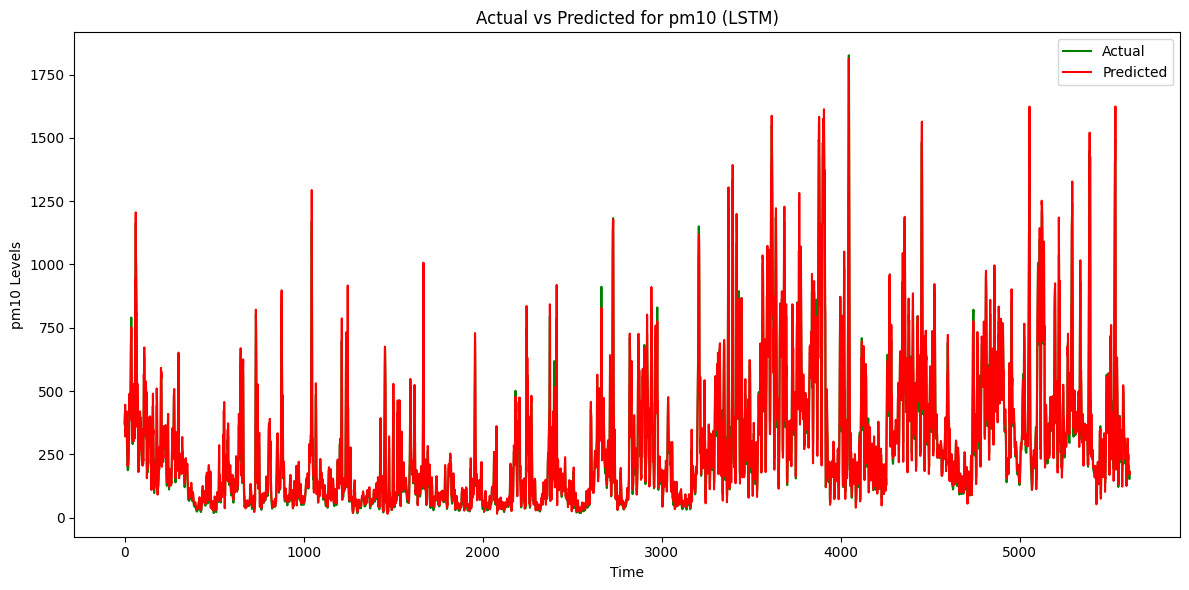

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path

# Selecting the target feature
features = ['pm10']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Use 70% of the data for training and the remaining 30% for prediction
train_size = int(0.7 * len(X))
X_train, y_train = X[:train_size], y[:train_size]

# Define and train the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next 30% of data
X_predict = X[train_size:]
y_predict = y[train_size:]

# Predict for the next 30% of records
predictions = model.predict(X_predict)

# Inverse scaling
predictions_original = scaler.inverse_transform(predictions)
y_predict_original = scaler.inverse_transform(y_predict)

# Convert predictions and actual values to DataFrames
predictions_df = pd.DataFrame(predictions_original, columns=target)
y_test_df = pd.DataFrame(y_predict_original, columns=target)

# Performance metrics
mae_pm10= mean_absolute_error(y_test_df, predictions_df)
mse_pm10= mean_squared_error(y_test_df, predictions_df)
rmse_pm10= np.sqrt(mse_pm10)

print(f"Performance Metrics for LSTM:")
print(f"Mean Absolute Error (MAE): {mae_pm10:.4f}")
print(f"Mean Squared Error (MSE): {mse_pm10:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_pm10:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_df['pm10'], label='Actual', color='green')
plt.plot(predictions_df['pm10'], label='Predicted', color='red')
plt.title('Actual vs Predicted for pm10 (LSTM)')
plt.xlabel('Time')
plt.ylabel('pm10 Levels')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
mae=(mae_co+mae_nh3+mae_no+mae_no2+mae_o3+mae_pm10+mae_pm25+mae_so2)/8

In [ ]:
print(mae)

42.72311787242538
